<a href="https://colab.research.google.com/github/yakin-ts/Competitive-programming/blob/master/crop_yield_prediction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [ ]:
# Load the data
yield_df = pd.read_csv('drive/MyDrive/crop_yield_prediction/yield_df.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
yield_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values.

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [ ]:
#data_oreoroccesing
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Unnamed: 0,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1990,1485.0,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1990,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1990,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1990,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,1990,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
features = features.drop(['Year'], axis=1)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 115 entries, Unnamed: 0 to Item_Yams
dtypes: float64(3), int64(1), uint8(111)
memory usage: 3.9 MB


Scaling features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [ ]:
features

array([[0.00000000e+00, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.54095110e-05, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.08190220e-05, 4.49670743e-01, 3.28894097e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99929181e-01, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99964590e-01, 1.90028222e-01, 6.93361288e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90028222e-01, 6.93361288e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

**Training Data**

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset)

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

**Model Comparision and Selection**

In [ ]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [ ]:
# model_train=list(map(compare_models,models))

KeyboardInterrupt: ignored

In [ ]:
# print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8990175981649151]
['RandomForestRegressor', 0.6844577813798365]
['SVR', -0.19584551303871556]
['DecisionTreeRegressor', 0.9819388745001496]


Therefor using DecisionTreeRegressor bold text

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model = model.fit(train_data,train_labels)

In [ ]:
y_pred= model.predict(test_data)

Comparing Actual values with Predicted Value

In [ ]:
df_val = pd.DataFrame({'actual value': test_labels, 'predicted value': y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val

,actual value,predicted value
0,69220,72015.0
1,20000,25000.0
2,51206,51206.0
3,166986,156377.0
4,56319,56522.0
...,...,...
8468,47116,48009.0
8469,55990,62275.0
8470,20987,21025.0
8471,68333,80000.0


In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(test_loss, test_acc)

AttributeError: ignored

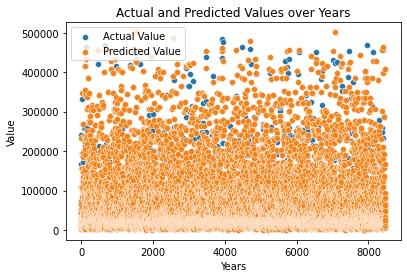

In [ ]:
# import
import matplotlib.pyplot as plt

# Generate Year Values
year = np.arange(0, 8473)

# Plot
sns.scatterplot(x=year, y="actual value", data=df_val, label="Actual Value")
sns.scatterplot(x=year, y="predicted value", data=df_val, label="Predicted Value")
plt.title('Actual and Predicted Values over Years')
plt.xlabel('Years')
plt.ylabel('Value')
plt.show()

In [ ]:
import pickle


In [ ]:

# Save the entire model as a SavedModel.
!mkdir -p saved_model

 pickle.dumps(model)

AttributeError: ignored